In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

minimum value: -1.0
x: 0.6999999965082352
minimum value: -1.0
x: 0.6999999997839409


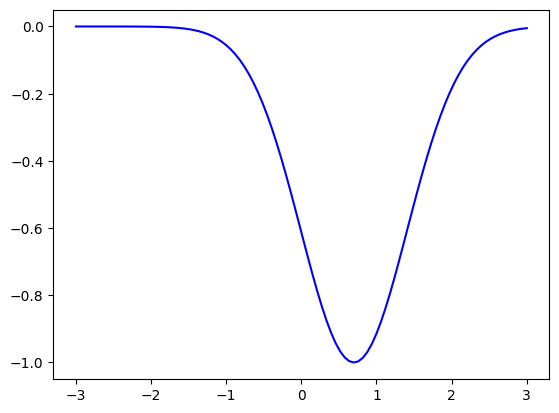

In [7]:
# 가장 간단한 함수 만들어서 그 함수의 minimum 값을 찾아보겠음.

def f(x):
    return -np.exp(-(x-0.7)**2.0)

x = np.linspace(-3, 3, 100)
y = f(x)
plt.plot(x, y, c='b')

result = optimize.minimize_scalar(f, method='Golden')
# optimize.minimize_scalar(fun, bracket=None, bounds=None, args=(), method=None, tol=None, options=None, )
''' message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.4901161193847656e-08 )
 success: True
     fun: -1.0 -> minimum
       x: 0.6999999965082352 -> minimum에 해당하는 값
     nit: 39 -> 줄여가는 행위한 횟수
    nfev: 44'''

x_min = result.x
print('minimum value:', result.fun)
print('x:', x_min)

result = optimize.minimize_scalar(f, method='brent')
x_min = result.x
print('minimum value:', result.fun)
print('x:', x_min)


 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.4901161193847656e-08 )
 success: True
     fun: 0.17451818777634331
       x: 0.550321210690305
     nit: 40
    nfev: 45


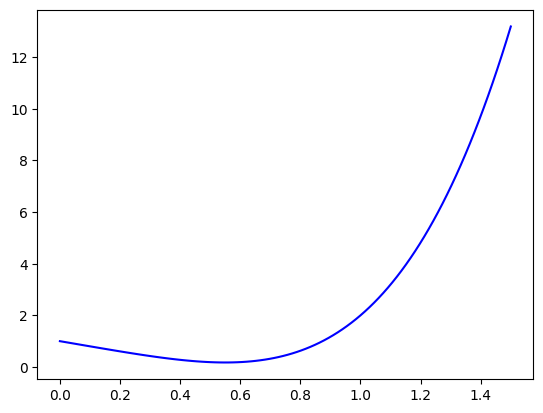

In [8]:
def f2(x):
    return 3*x**4 - 2*x + 1

x = np.linspace(0, 1.5, 100)
y = f2(x)
plt.plot(x, y, c='b')

result = optimize.minimize_scalar(f2, method='Golden')
print(result)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.4288819424803534
        x: [-7.071e-01 -7.451e-09]
      nit: 6
      jac: [ 1.490e-08  0.000e+00]
 hess_inv: [[ 5.833e-01 -1.619e-24]
            [-1.619e-24  1.000e+00]]
     nfev: 21
     njev: 7

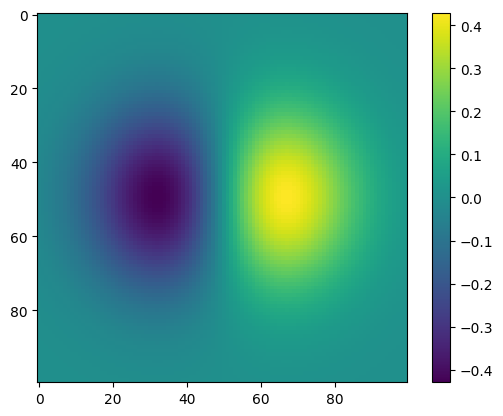

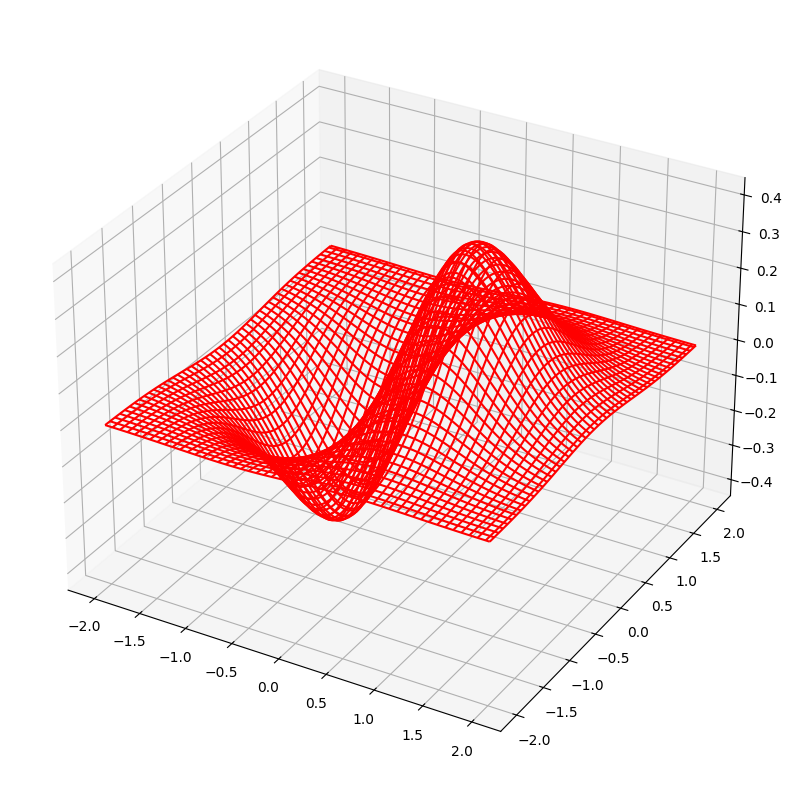

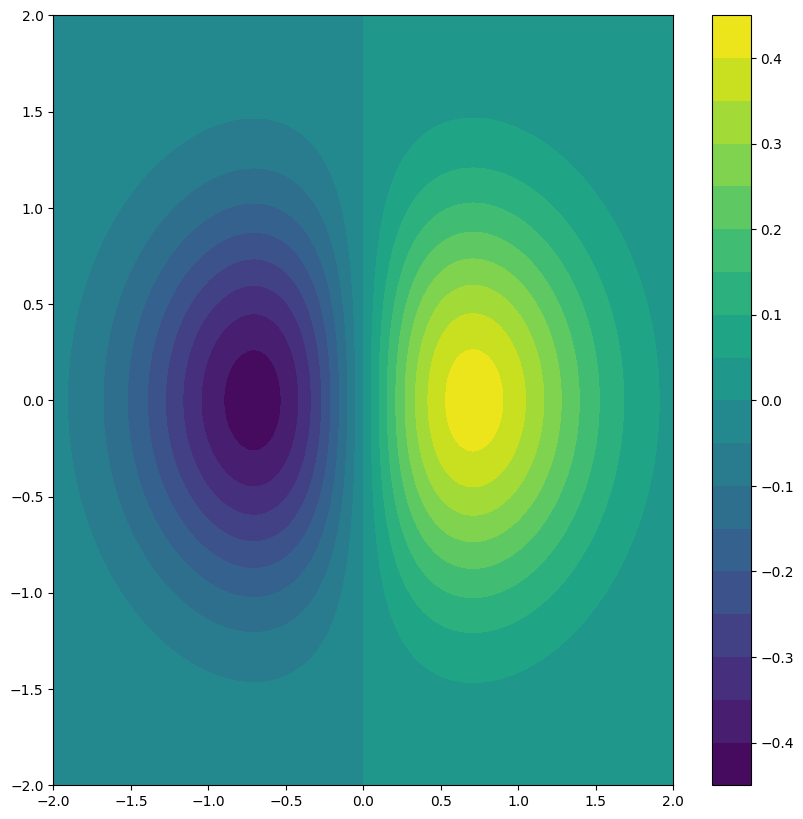

In [9]:
# 2-dimensional

from mpl_toolkits.mplot3d import Axes3D

def f3_min(x): #optimize.minimize() 이거 쓰려면 변수 1개 있어야 함. x array 형태가 필요함
    return x[0]*np.exp(-x[0]**2-x[1]**2)

def f3(x, y): #얘는 그림 그리기 위함임. 
    return x*np.exp(-x**2-y**2)

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
xgrid, ygrid = np.meshgrid(x, y)
z = f3(xgrid, ygrid)

#2-d projection
plt.imshow(z)
plt.colorbar()

#3-d image
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_wireframe(xgrid, ygrid, z, color='r')

#contour
fig = plt.figure(figsize=(10,10))
plt.contourf(x, y, z, 20)
plt.colorbar()

optimize.minimize(f3_min, [-0.5, 0])

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 4.3224481708936595e-12
       x: [ 1.000e+00  1.000e+00]
     nit: 9
     jac: [-1.477e-06 -6.634e-07]
    nfev: 63
    njev: 21

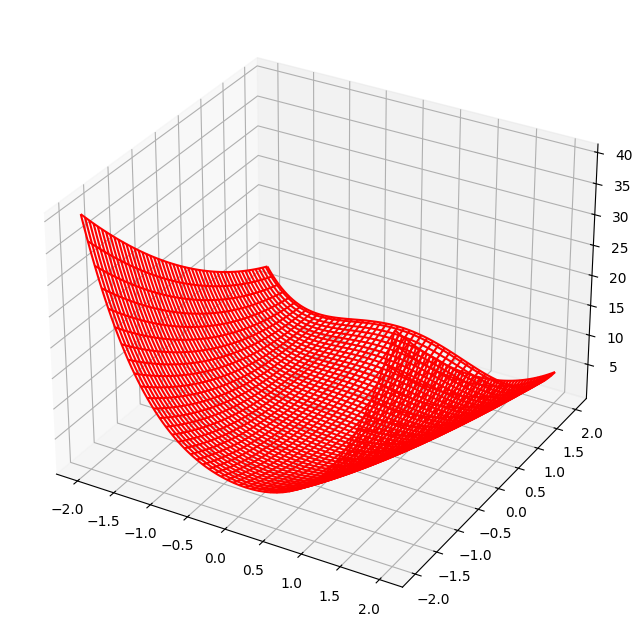

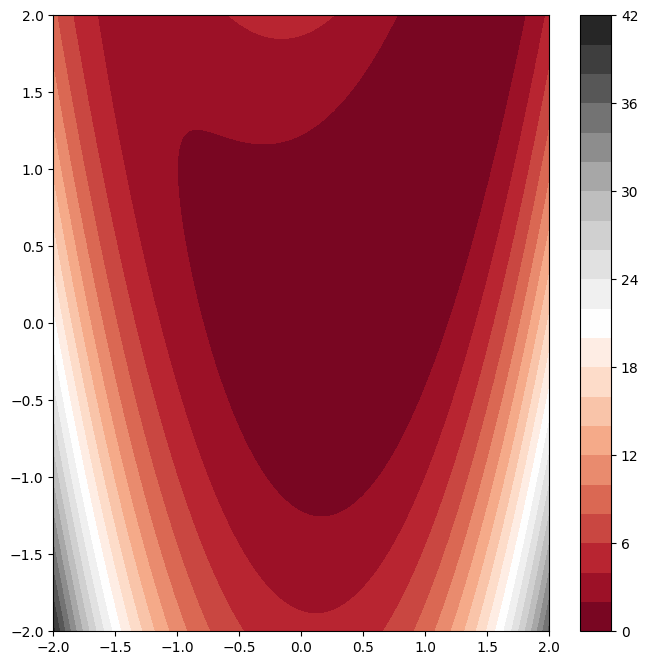

In [10]:
def f4(x, y):
    return 0.5*(1-x)**2.0 + (y-x**2)**2

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
xgrid, ygrid = np.meshgrid(x, y)
z = f4(xgrid, ygrid)

#3-d image
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_wireframe(xgrid, ygrid, z, color='r')

#contour
fig = plt.figure(figsize=(8,8))
plt.contourf(x, y, z, 20, cmap='RdGy')
plt.colorbar()

def f4_min(x):
    return 0.5*(1-x[0])**2.0 + (x[1]-x[0]**2)**2

optimize.minimize(f4_min, [0.7, 0.5], method='CG')

실습

In [22]:
from scipy.integrate import quad

def int_func(x, a, b):
    return a*np.exp(-(x-b)**2)*x**2

def chisq_func(x, hist, binmin, binmax, binsize, nbin, ndata):
    model1 = []
    xarr = []
    for i in range(nbin):
        xa = binmin + binsize*i
        xb = binmin + binsize*(i+1)
        a = x[0]
        b = x[1]
        value, err = quad(int_func, xa, xb, args=(a,b))
        model1.append(value*ndata)
        xarr.append(xa)

    chisq = sum((hist - model1)**2/model1)
    return chisq

data = np.loadtxt('file_midterm.txt')
ndata = len(data)
binmin = 0
binmax = 8
binsize = 0.1
nbin = int((binmax-binmin)/binsize)
hist, bin_edges = np.histogram(data, bins=nbin, range=(binmin,binmax))

x = np.linspace(0,8,80)

result = optimize.minimize(chisq_func, [0.06, 2.5], args=(hist, binmin, binmax, binsize, nbin, ndata), tol=1e-5)
print(result)


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 376.4123643903953
        x: [ 6.024e-02  2.992e+00]
      nit: 9
      jac: [ 1.073e-02  1.301e-03]
 hess_inv: [[ 1.080e-07 -4.736e-07]
            [-4.736e-07  1.230e-05]]
     nfev: 170
     njev: 53
